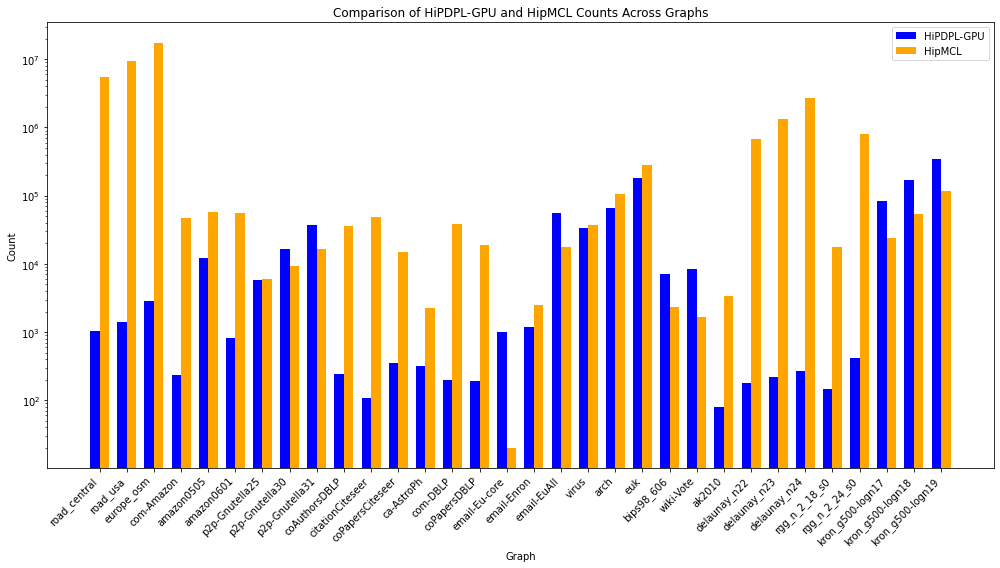

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
file_path = 'clustercount.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Define the specified order for the domains
domain_order = [
    'Road', 'Consumer', 'Internet', 'Citation', 'Collaboration', 
    'Communication', 'Protein', 'Other', 'Delaunay', 'Rgg', 'Rmat'
]

# Convert 'domain' column to a categorical type with the specified order, then sort
df['domain'] = pd.Categorical(df['domain'], categories=domain_order, ordered=True)
df_sorted = df.sort_values(by=['domain', 'edges'])

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars for each dataset with side-by-side bars
x = range(len(df_sorted))
bar_width = 0.35

# Plotting hipdpl and hipmcl values
plt.bar([i - bar_width / 2 for i in x], df_sorted['hipdpl_graphs #'], width=bar_width, label='HiPDPL-GPU', color='blue')
plt.bar([i + bar_width / 2 for i in x], df_sorted['hipmcl_graphs #'], width=bar_width, label='HipMCL', color='orange')

# Labeling
ax.set_xlabel("Graph")
ax.set_ylabel("Count")
ax.set_title("Comparison of HiPDPL-GPU and HipMCL Counts Across Graphs")
ax.set_yscale("log")  # Set y-axis to logarithmic scale
ax.set_xticks(x)
ax.set_xticklabels(df_sorted['graphs'], rotation=45, ha="right")
ax.legend()

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("hipdpl_vs_hipmcl_comparison.pdf", format="pdf")
plt.show()
